# US Stock Market
In this notebook I look at:
* the market capitalization of listed domestic companies in the US
* the market capitalization of listed domestic companies in the US as percentage of US GDP
* the total annual value of stocks traded on US exchanges 
* the total annual value of stocks traded on US exchanges as perccentage of US GDP

The only publically available source of these data is [The World Bank](https://data.worldbank.org). Unfortunately it only provides data at annual granularity rather than quarterly or monthly. All amounts are represented in either Billions of USD or as percentage points.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from pandas_datareader import wb

from datetime import date

In [2]:
report_start = date.fromisoformat('1959-01-01')
report_end = date.today()

In [3]:
stock_mkt = wb.download(indicator=['CM.MKT.LCAP.CD', 'CM.MKT.LCAP.GD.ZS', 'CM.MKT.TRAD.CD', 'CM.MKT.TRAD.GD.ZS'],
                        country='US', start=report_start, end=report_end).loc['United States'].dropna()
stock_mkt.index = pd.to_datetime(stock_mkt.index).shift(1, 'A')
stock_mkt = stock_mkt.asfreq('A')

# Convert into billions of USD
stock_mkt.loc[:, ['CM.MKT.LCAP.CD', 'CM.MKT.TRAD.CD']] /= 1e9

In [4]:
ts = pd.to_datetime('2023-12-31')
if stock_mkt.index[-1] < ts:
    # Small adjustment for not yet published data for US market capitalization at the end of 2023
    stock_mkt.loc[ts, 'CM.MKT.LCAP.CD'] = 50781.6975
    gdp = web.get_data_fred('GDPA', start=report_start, end=report_end)
    gdp.index = gdp.index.shift(1, 'A')
    gdp = gdp.asfreq('A')
    stock_mkt.loc[ts, 'CM.MKT.LCAP.GD.ZS'] = stock_mkt.loc[ts, 'CM.MKT.LCAP.CD'] / gdp.GDPA.loc[ts] * 100

In [5]:
# Human readable column names for DataFrames
MKT_CAP = 'Market capitalization of listed domestic companies'
MKT_CAP_TO_GDP = MKT_CAP + ' (% of GDP)'
MKT_CAP_GRAPH_TITLE = 'US ' + MKT_CAP
TRAD_VOL = 'Stocks traded, total value'
TRAD_VOL_TO_GDP = TRAD_VOL + ' (% of GDP)'
TRAD_VOL_GRAPH_TITLE = 'US ' + TRAD_VOL + ' (annual)'

In [6]:
stock_mkt.rename(
    columns={'CM.MKT.LCAP.CD': MKT_CAP, 'CM.MKT.LCAP.GD.ZS': MKT_CAP_TO_GDP,
             'CM.MKT.TRAD.CD': TRAD_VOL, 'CM.MKT.TRAD.GD.ZS': TRAD_VOL_TO_GDP},
    inplace=True)

In [7]:
pd.options.display.max_rows = 40
stock_mkt

,Market capitalization of listed domestic companies,Market capitalization of listed domestic companies (% of GDP),"Stocks traded, total value","Stocks traded, total value (% of GDP)"
year,,,,
1975-12-31,703.80000,41.770926,137.28100,8.147705
1976-12-31,883.10000,47.138590,173.32100,9.251622
1977-12-31,834.23800,40.072417,165.87400,7.967717
1978-12-31,861.96100,36.654251,225.84400,9.603848
1979-12-31,993.59090,37.817471,271.85090,10.347029
...,...,...,...,...
2019-12-31,34085.72737,159.420820,36342.31408,169.975000
2020-12-31,41569.86177,197.383319,41086.46143,195.088022
2021-12-31,48548.53812,208.228052,45874.14553,196.757397


In [8]:
LEFT_Y_AXIS_LABEL = 'Billions of USD'
RIGHT_Y_AXIS_LABEL = '% of GDP'

## Market capitalization of listed domestic companies and its ratio to GDP
These measures allow to assess how overpriced the US stock market is. When the market capitalization in a given economy is more or less the same as the GDP, the market is considered fairly priced, higher capitalizations are deemed expensive. However, different markets have different norms of what is cheap or expensive when it comes to stock market capitalization to GDP ratios. The US stock market receives an extra premium thanks to its remarkable historical growth, high standards of corporate governanance, high volumes and liquidity.

**NB**: the market capitalzaion to GDP ratio only tells how cheap or expensive the overall stock market is. Even when the whole market is overpriced, it can contain adequately priced individual stocks.

Market capitalization values provided for a given year represent the weighted average capitalization of US listed domestic companies accross all trading days in that year. All dollar amounts are nominal, i.e. without adjustments for inflation.

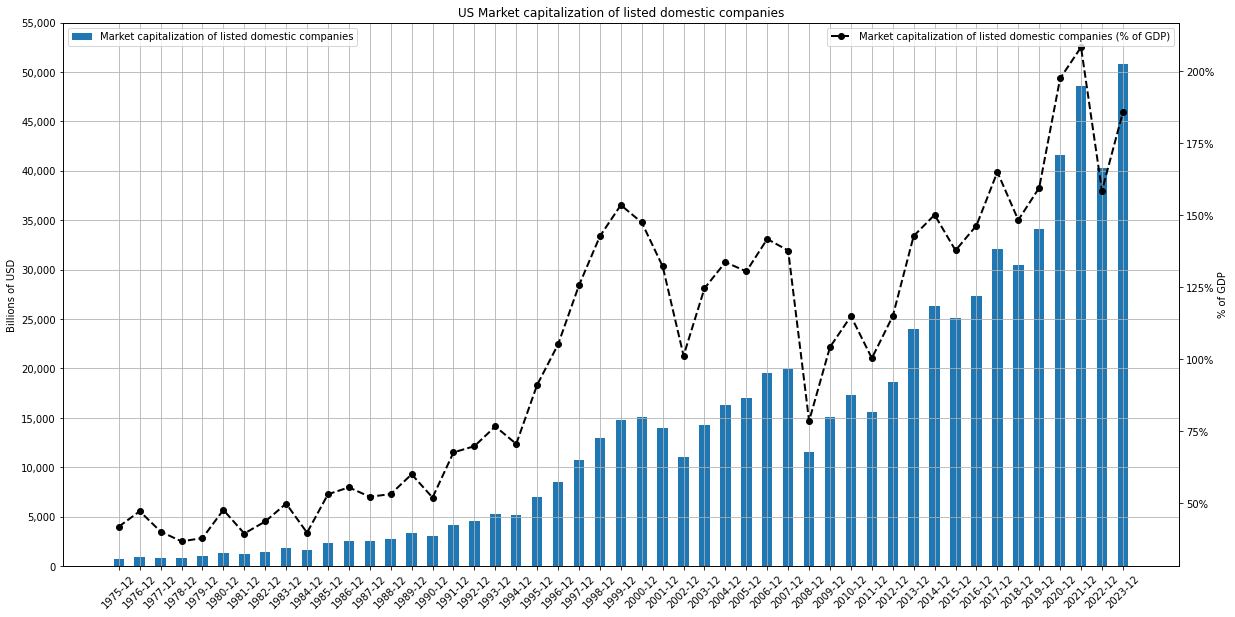

In [9]:
fig, ax = plt.subplots(figsize=(20, 10))
ax2 = ax.twinx()
ax.bar(x=range(len(stock_mkt)), height=stock_mkt.iloc[:,0], color='#1f77b4', width=0.5, label=MKT_CAP)
ax2.plot(range(len(stock_mkt)), stock_mkt.iloc[:,1], color='k', marker='o', label=MKT_CAP_TO_GDP,
         linestyle='--', linewidth=2)
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax.title.set_text(MKT_CAP_GRAPH_TITLE)
ax.grid(True)
_ = ax.set_xticks(range(len(stock_mkt)), stock_mkt.index)
_ = ax.set_xticklabels(stock_mkt.index.strftime('%Y-%m'), rotation=45)
ax.set_yticks(np.arange(0, 56000, 5000))
ax.set_ylabel(LEFT_Y_AXIS_LABEL)
ax.yaxis.set_major_formatter('{x:,.0f}')
ax2.set_ylabel(RIGHT_Y_AXIS_LABEL)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

## Total annual value of stocks traded on US exchanges and its ratio to GDP
I look at the total volumes of domestic and foreign stocks traded on US exchanges in the whole year. If you want to approximate the daily trading volumes, please divide the annual value by 252, which is an approximation for the number of trading days in the US. All dollar amounts are nominal, i.e. without adjustments for inflation.

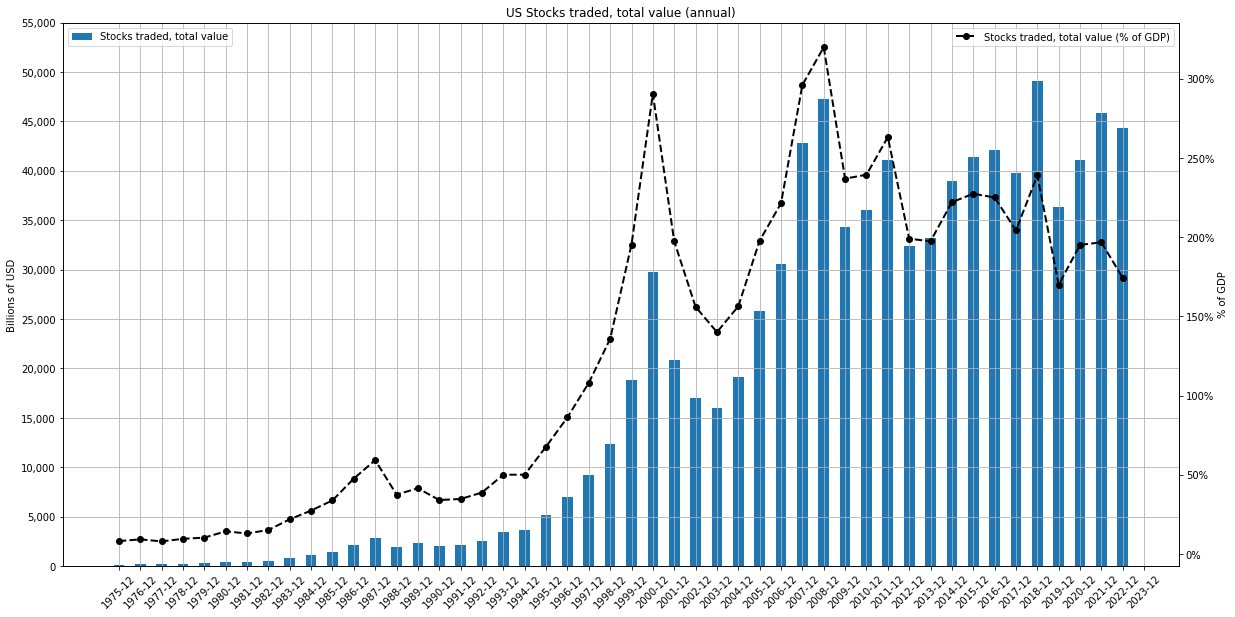

In [10]:
fig, ax = plt.subplots(figsize=(20, 10))
ax2 = ax.twinx()
ax.bar(x=range(len(stock_mkt)), height=stock_mkt.iloc[:,2], color='#1f77b4', width=0.5, label=TRAD_VOL)
ax2.plot(range(len(stock_mkt)), stock_mkt.iloc[:,3], color='k', marker='o', label=TRAD_VOL_TO_GDP,
         linestyle='--', linewidth=2)
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax.title.set_text(TRAD_VOL_GRAPH_TITLE)
ax.grid(True)
_ = ax.set_xticks(range(len(stock_mkt)), stock_mkt.index)
_ = ax.set_xticklabels(stock_mkt.index.strftime('%Y-%m'), rotation=45)
ax.set_yticks(np.arange(0, 56000, 5000))
ax.set_ylabel(LEFT_Y_AXIS_LABEL)
ax.yaxis.set_major_formatter('{x:,.0f}')
ax2.set_ylabel(RIGHT_Y_AXIS_LABEL)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())